In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

### Init

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.keras'

In [3]:
NUM_CLASSES = 7

In [4]:
TIME_STEPS = 16
DIMENSION = 2

### Data

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [ ]:
unique, counts = np.unique(y_dataset, return_counts=True)
print(dict(zip(unique, counts)))


Method 1 - Using numpy unique:
{0: 1481, 1: 1234, 2: 1279, 3: 942, 4: 603, 5: 681, 6: 738}


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

### Model setup

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
    tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


c:\Users\azrua\OneDrive\Desktop\332_finalProj\332_venv\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
c:\Users\azrua\OneDrive\Desktop\332_finalProj\332_venv\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\azrua\OneDrive\Desktop\332_finalProj\332_venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 16, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 16)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            77 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,463 (5.71 KB)

 Trainable params: 1,463 (5.71 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, 
    verbose=1, 
    save_weights_only=False
)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Training

In [13]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2953 - loss: 1.9348
Epoch 1: saving model to model/point_history_classifier/point_history_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2967 - loss: 1.9346 - val_accuracy: 0.4115 - val_loss: 1.9099
Epoch 2/1000
37/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4072 - loss: 1.8954
Epoch 2: saving model to model/point_history_classifier/point_history_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4091 - loss: 1.8937 - val_accuracy: 0.4592 - val_loss: 1.8445
Epoch 3/1000
28/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4548 - loss: 1.8204
Epoch 3: saving model to model/point_history_classifier/point_history_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4465 - loss: 1.8120 - val_accuracy: 0.4603 - val_loss: 1.7341
Epoch 4/1000
27/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4557 - loss: 1.6989
Epoch 4: saving model to model/point_history_clas

In [ ]:
model = tf.keras.models.load_model(model_save_path)

In [ ]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
[6.1435632e-14 1.3519607e-06 1.0415100e-04 2.0828145e-04 1.0130286e-06
 9.9596977e-01 3.7155850e-03]
5


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


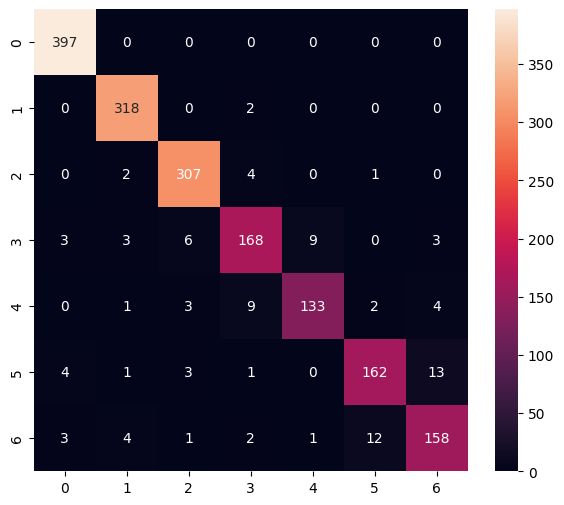

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       397
           1       0.97      0.99      0.98       320
           2       0.96      0.98      0.97       314
           3       0.90      0.88      0.89       192
           4       0.93      0.88      0.90       152
           5       0.92      0.88      0.90       184
           6       0.89      0.87      0.88       181

    accuracy                           0.94      1740
   macro avg       0.93      0.92      0.93      1740
weighted avg       0.94      0.94      0.94      1740



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [ ]:
model.save(model_save_path, include_optimizer=False)